## 지도학습 - 찾고자 하는 값(y), 예측하고자 하는 것이 존재
#### 분류분석 : 비연속적 값 예측 - classification/ 비연속적 값이 어느 범주에 들어가는지
#### 회귀분석 : 연속적 값 예측 - regression/ 연속적 값이 어떤 특정 값에 수렴하는지
<br>

#### 회귀분석은 확률적 관계에 적합하고 분류분석은 확정적 관계에 적합하다. 
#### ex)주식의 가격 vs 불량품&정상제품
#### 회귀분석 : 오차항이 존재 vs 분류분석 : 오차항이 없음

<br><br>
## 비지도학습 - 찾고자 하는 값(y)가 없다. 비슷한 것끼리 묶을 뿐
#### 군집분석 : 데이터를 비슷한 특성을 갖는 그룹으로 묶어주는 알고리즘 - clustering

## 연속데이터를 예측하는 알고리즘은 주로 리니어 리그레션을 사용한다
## -> (회귀분석 : regression)

## 독립변수 : 예측을 위해 사용하는 데이터 - > X
## 종속변수 : 예측의 대상이 되는 데이터 -> Y(label)

## overfitting(과적합) : 학습데이터만 잘 맞추는 상태
## underfitting(과소적합) : 학습이 제대로 안 된 상태

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
# from sklearn.metrics import classification_report
# classification_report는 연속데이터에서 사용 불가

# 머신러닝의 기본프로세스
## 0. 데이터 선택 및 전처리
## 1. x, y 데이터 분리 -> train_test_split(x,y)
## 2. 알고리즘 선택 -> 적절한 알고리즘 import
### 리니어리그레션/SVM/결정트리/게으른이웃/KMeans 등
## 3. 알고리즘에 학습 -> .fit(x_train)
## 4. 학습시킨 모델을 통해 예측 -> .predict(x_test)
## 5. 예측결과를 평가 -> classification_report(y_test, predictions) 

In [2]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 분석할 데이터 가져오기

In [3]:
df = pd.read_csv('./csvfiles/mldata/USA_Housing.csv')

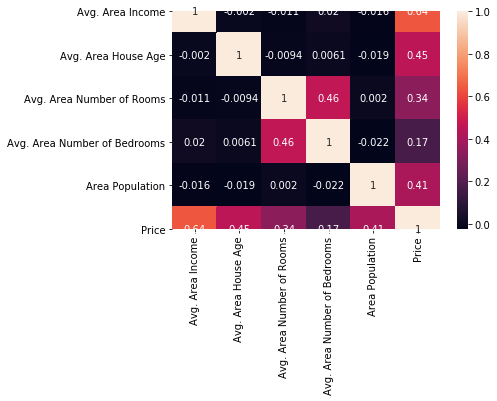

In [4]:
# 본격적인 분석 이전에 각 컬럼간 상관도를 눈으로 볼 수 있다
# sns.pairplot(df)
sns.heatmap(df.corr(), annot=True)

# 독립변수와 종속변수 설정

In [5]:
# Price와 Address를 제외하고 x를 설정하는 2가지 방법
x = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
# x = df.drop(['Price','Address'], axis=1)

# 예측하고자 하는 값 = Price이므로 Price가 y값이 된다
y = df['Price']

## 만약 학습용데이터와 테스트용 데이터를 수동으로 나눈다면...
x_train = x[:3500]<br>
x_test = x[3500:]<br>
y_train = y[:3500]<br>
y_test = y[3500:]<br>
# ※데이터가 편중되어 제대로된 분석이 안 될 수 있다.

# 1. 학습용/테스트용 데이터 분리하기

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=777)

# 3. .fit(x,y)
x학습용 데이터, y학습용 데이터 결과값 으로 학습시키기

In [7]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# 4. .predict(x)
테스트용 데이터로 예측시켜보기

In [8]:
predictions = lr.predict(x_test)
predictions

array([ 689314.12643602, 1539724.49535316,  661481.40907726, ...,
       1018356.45702186,  984919.01563555, 1077321.70146905])

# 5. 모델의 정확도 평가하기

## 모델 평가지표
### - regression : R**2, MSE, MAE, RMSE 등

### - classification :
### -> Accuracy(정확도), Error Rate(오류율), Precision(정밀도), 
### Recalkl Rate(재현율), f1_score(정밀도와 재현율의 조화평균) , Auc_score(roc_curve) 등

In [9]:
from sklearn import metrics
print('MSE(mean_squared_error) : ', metrics.mean_squared_error(y_test, predictions))
print('RMSE(Root mean_squared_error) : ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('MAE(mean_absolute_error) : ', metrics.mean_absolute_error(y_test, predictions))

MSE(mean_squared_error) :  10437138724.02494
RMSE(Root mean_squared_error) :  102162.31557685515
MAE(mean_absolute_error) :  82089.37187231699


## 에러는 +와 -가 있기때문에 단순합이 아닌 제곱합이나 절대합으로 낸다.

In [10]:
print('R**2:', lr.score(x_test, y_test))

R**2: 0.9190216176581373


In [12]:
lr.coef_
# 각 독립변수(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
# Avg. Area Number of Bedrooms', 'Area Population']) 에 대한 w값

array([2.14281889e+01, 1.64857969e+05, 1.20247960e+05, 9.90182182e+02,
       1.51744733e+01])

In [14]:
lr.intercept_

-2614108.5381366895

In [15]:
# 주택가격 y의 계산식
# y = x1*2.17 + x2* 1.6 + x3*1.19 + x4*1.48 + x5*1.52 -2635501

In [13]:
coef_df = pd.DataFrame(lr.coef_, columns=['Co_efficient'], index=x.columns) # 데이터프레임화
coef_df

,Co_efficient
Avg. Area Income,21.428189
Avg. Area House Age,164857.968674
Avg. Area Number of Rooms,120247.960371
Avg. Area Number of Bedrooms,990.182182
Area Population,15.174473


결정계수 = Coefficient of Determination
MAE(Mean Absolute Error, 잔차), MSE(mean_squared_error, 평균제곱오차) 데이터 scale에 따라 결과값이 천차만별
R^2 = R squared 개선 확인 : 보통 0<=R^2<=1, 1이 만점


# ======================================================# ======================================================

# 1. 데이터 선택

In [16]:
df = pd.read_csv('./csvfiles/mldata/Ecommerce Customers.csv')

In [44]:
df.head(1)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054


In [43]:
len(df['Email'].apply(lambda x : x.split('@')[1]).apply(lambda x: x.split('.')[0]).unique())

236

# 2. 전처리 및 사전정보 확인

In [18]:
# Avg. Session Length~Length of Membership을 이용해서 Yearly Amount Spent을 예측
# x에 사용할 컬럼추출
df.iloc[:,3:7:]

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


## 예측할 값과 가장 선형을 이루는 그래프를 대강 확인가능

## 6면체 그래프
#### sns.set_palette('GnBu_d')
#### sns.set_style('whitegrid')
#### sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=df, kind='hex')

In [32]:
#sns.pairplot(df)

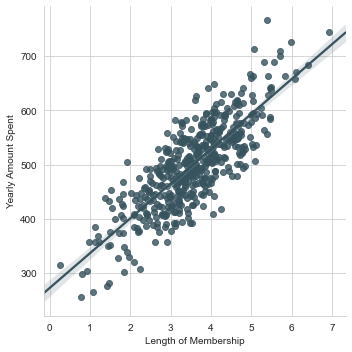

In [33]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

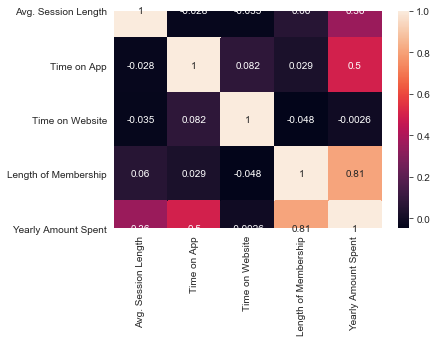

In [34]:
sns.heatmap(df.corr(), annot=True)

In [35]:
y = df['Yearly Amount Spent']
x = df.iloc[:,3:7:]

# 3. 학습/테스트 데이터 분리

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=77)

## 4. LinearRegression를 알고리즘으로 사용하고
## 5. .fit()함수를 통해 학습후
## 6. .predict()함수를 통해 예측값을 출력하고
## 7. 출력한 예측값과 예측용 데이터의 실제값을 scatter차트로 출력함

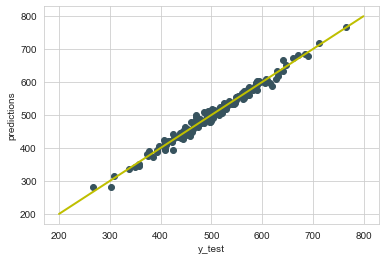

In [22]:
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
plt.scatter(y_test, predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.plot(range(200,800),range(200,800), lw=2, c='y')

### 실제값과 예측값을 DF로 보여주기

In [23]:
df2 = pd.DataFrame({'y_test':y_test, 'Predictions':predictions})
df2.head()

,y_test,Predictions
310,479.614812,477.897596
354,508.771907,502.229397
443,561.516532,548.591801
52,384.626572,373.293555
155,503.978379,501.500269


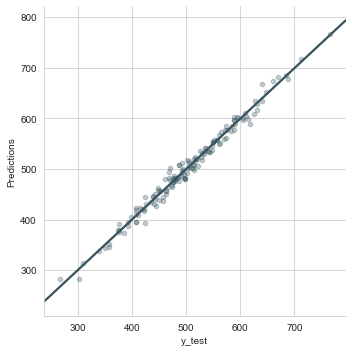

In [24]:
sns.lmplot(x = 'y_test', y= 'Predictions', data=df2,
          ci=None, palette='muted', height=5, scatter_kws={"s":20, "alpha":0.3})

## 예측오차 출력

In [25]:
print('MSE(mean_squared_error) : ', metrics.mean_squared_error(y_test, predictions))
print('RMSE(Root mean_squared_error) : ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('MAE(mean_absolute_error) : ', metrics.mean_absolute_error(y_test, predictions))

MSE(mean_squared_error) :  113.89696081016436
RMSE(Root mean_squared_error) :  10.67225190904733
MAE(mean_absolute_error) :  8.408963055982994


In [27]:
# lr모델의 결정계수 확인
# 결정계수(r**2)
lr.score(x_test, y_test)

0.98405115976938

In [28]:
metrics.r2_score(y_test, predictions)

0.98405115976938

# 각 컬럼(독립변수)의 계수(w값) 확인

In [29]:
coef_df = pd.DataFrame(lr.coef_, columns=['Co_efficient'], index=x.columns) # 데이터프레임화
coef_df

,Co_efficient
Avg. Session Length,26.112865
Time on App,38.739249
Time on Website,1.095566
Length of Membership,61.763516


In [30]:
print(lr.coef_)
print(lr.intercept_)

[26.11286504 38.7392485   1.09556591 61.7635163 ]
-1089.661295581112


In [31]:
# 회원의 연간소비액 y의 계산식
# y = x1*26.11 + x2* 38.73 + x3*1.09 + x4*61.76 -1089

# 결론
## 회원의 연간 소비액을 결정하는 가장 큰 변수는 회원의 가입기간이며
## 앱 사용 시간과 평균 로그인 시간이 그 다음으로 영향을 미치고
## 웹사이트에 접속해있는 시간은 별다른 영향이 없다.